Características de Sistemas de Segundo Orden
==========================================
En sistemas de segundo orden son aquellos que pueden describirse mediante una ecuación diferencial de segundo orden o una función de transferencia con un polinomio cuadrático en el denominador. Estos sistemas exhiben comportamientos dinámicos más complejos que los sistemas de primer orden, incluyendo oscilaciones y amortiguamiento.
Algunas características clave de los sistemas de segundo orden incluyen:
1. **Frecuencia natural ($\omega_n$)**: Es la frecuencia a la cual el sistema oscilaría si no hubiera amortiguamiento. Se mide en radianes por segundo (rad/s).
2. **Factor de amortiguamiento ($\zeta$)**: Es una medida de cuánto se reduce la oscilación en el sistema. Los valores comunes son:
   - $\zeta = 0$: Sistema no amortiguado (oscila indefinidamente).
   - $0 < \zeta < 1$: Sistema subamortiguado (oscila con decaimiento).
   - $\zeta = 1$: Sistema críticamente amortiguado (regresa al equilibrio sin oscilar).
   - $\zeta > 1$: Sistema sobreamortiguado (regresa al equilibrio lentamente sin oscilar).
3. **Estabilidad**: Un sistema de segundo orden es estable si todos los polos de su función de transferencia tienen partes reales negativas.
4. **Función de transferencia típica**: La función de transferencia de un sistema de segundo orden se puede expresar como:
$G(s) = \frac{K \omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$, donde $K$ es la ganancia del sistema.

Polos y ceros de Sistemas de Segundo Orden
---------------------------------------
En sistemas de segundo orden, los polos y ceros juegan un papel crucial en la determinación de la dinámica del sistema. Los polos son los valores de $s$ que hacen que el denominador de la función de transferencia sea cero, mientras que los ceros son los valores de $s$ que hacen que el numerador sea cero.
Para un sistema de segundo orden típico con la función de transferencia:
$$G(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$
los polos se pueden encontrar resolviendo la ecuación cuadrática en el denominador, mientras que los ceros se encuentran resolviendo la ecuación en el numerador. En este caso, el sistema no tiene ceros.

Los polos de un sistema de segundo orden determinan la estabilidad y la respuesta temporal del sistema. La ubicación de los polos en el plano complejo afecta la rapidez con la que el sistema responde a las entradas y si la respuesta es oscilatoria o no.
Sean los polos del sistema, que se pueden expresar como:
$$s_{1,2} = -\zeta \omega_n \pm \omega_n \sqrt{\zeta^2 - 1}$$
La naturaleza de estos polos depende del valor del factor de amortiguamiento $\zeta$:
- Si $\zeta > 1$, los polos son reales y negativos, lo que indica un sistema sobreamortiguado.
- Si $\zeta = 1$, los polos son reales e iguales, lo que indica un sistema críticamente amortiguado.
- Si $0 < \zeta < 1$, los polos son complejos conjugados con partes reales negativas, lo que indica un sistema subamortiguado.
- Si $\zeta = 0$, los polos son puramente imaginarios, lo que indica un sistema no amortiguado.
La estabilidad del sistema se determina observando la parte real de los polos. Un sistema es estable si todos los polos tienen partes reales negativas.

Estabilidad de Sistemas de Segundo Orden
---------------------------------------
La estabilidad de un sistema de segundo orden está determinada por la ubicación de sus polos en el plano complejo. Los polos son los valores de $s$ que hacen que el denominador de la función de transferencia sea cero. Por ejemplo:
- Si los polos tienen partes reales negativas, el sistema es estable.   
- Si los polos tienen partes reales positivas, el sistema es inestable.
- Si los polos tienen partes reales iguales a cero, el sistema es marginalmente estable.
En un sistema de segundo orden, la estabilidad también está influenciada por el factor de amortiguamiento ($\zeta$):
- Para $\zeta > 0$, el sistema es estable.
- Para $\zeta = 0$, el sistema es marginalmente estable.
- Para $\zeta < 0$, el sistema es inestable.


Ejemplo de aplicación: Control de posición de un motor DC: El servomotor
---------------------------------------
Consideremos un motor DC de corriente continua que se utiliza para controlar la posición de un eje. La función de transferencia del motor puede modelarse de la siguiente manera:
$$G(s) = \frac{\theta(s)}{T(s)} = \frac{1}{s(Js + B)}$$
donde:
- $\theta(s)$ es la posición angular del eje en el dominio de Laplace.
- $T(s)$ es el torque aplicado al motor.
- $J$ es el momento de inercia del rotor.
- $B$ es el coeficiente de fricción viscosa.

Dónde la función de transferencia del sistema en lazo cerrado es:
$$G_{cl}(s) = \frac{K}{Js^2 + Bs + K}$$
donde $K$ es la ganancia del controlador proporcional.

Analizando los polos del sistema en lazo cerrado, podemos determinar la estabilidad y el comportamiento dinámico del motor. Ajustando los parámetros $J$, $B$ y $K$, podemos diseñar el sistema para que tenga un factor de amortiguamiento adecuado ($\zeta$) y una frecuencia natural ($\omega_n$) que cumplan con los requisitos de rendimiento deseados.

Podemos reescribir la función de transferencia en la forma estándar de un sistema de segundo orden:
$$G_{cl}(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$
donde:
- $\omega_n = \sqrt{\frac{K}{J}}$ es la frecuencia natural del sistema.
- $\zeta = \frac{B}{2\sqrt{JK}}$ es el factor de amortiguamiento.

CASO 1. Subamortiguado ($\zeta >1$)
------------------------------
Utilice los siguientes parámetros:
- $J = 0.01 \, \text{kg·m}^2$
- $B = 0.2 \, \text{N·m·s}/rad$
- $K = 1 \, \text{N·m}/rad$

In [1]:
# Escriba las líneas de código para importar bibliotecas necesarias: numpy, matplotlib.pyplot, control
# importar solo solve_ivp de scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import control as ct 
from scipy.integrate import solve_ivp

In [14]:
# Función para resolver por método numérico de euler
def f_euler(f, tspan, x0, h):
    class Solution:
        pass
    sol = Solution()
    t0, tf = tspan
    N = int((tf - t0) / h) + 1
    t = np.linspace(t0, tf, N)
    x = np.zeros((len(x0), N))
    x[:, 0] = x0
    for i in range(1, N):
        x[:, i] = x[:, i-1] + h * f(t[i-1], x[:, i-1])
    sol.t = t
    sol.y = x
    return sol
def entrada_escalon(t):
    if t >= 0:
        return 1
    else:
        return 0
# Definir función a resolver
# f(t,x)=dx/dt Para casos de orden superior a 1, x es un vector
def f(t,x):
    x1 = x[0]
    x2 = x[1]
    u = entrada_escalon(t)
    # La salida debe ser arreglo numpy
    dx1dt = x2
    dx2dt = -B/J*x2 - K/J*x1 + K/J*u
    return np.array([dx1dt, dx2dt])

<TransferFunction>: sys[35]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

         1e+06
  --------------------
  s^2 + 1000 s + 1e+06
[-500.+866.02540378j -500.-866.02540378j]
[]


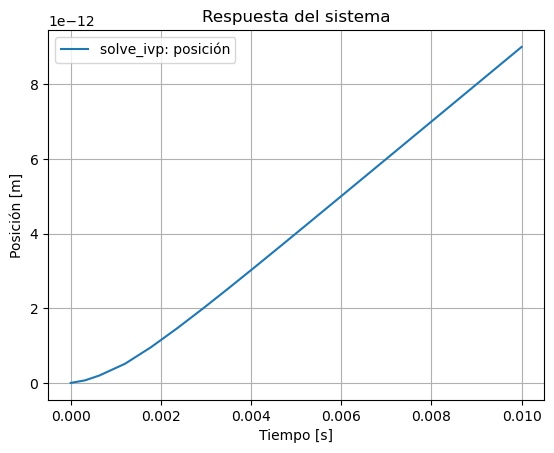

In [40]:
# Parámetros del sistema
wn = 1000.0 #sqrt(K/J) # frecuencia natural
zeta = 0.5 #B/(2*J*wn) # factor de amortiguamiento
K = 1
J = wn**2 / K
B = 2*zeta*wn*J
# Definir la función de transferencia del sistema
num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
sys = ct.tf(num, den)
print(sys)
print(ct.poles(sys))
print(ct.zeros(sys))
# Definir el intervalo de tiempo y condiciones iniciales
tspan = (0, 0.01)
y0 = [0, 0]  # condiciones iniciales: [posición, velocidad] 
h = 0.00001  # tamaño de paso para el método de Euler
# Resolver el sistema usando solve_ivp
sol_ivp = solve_ivp(f, tspan, y0,method = 'LSODA')
# Resolver el sistema usando el método de Euler
sol_euler = f_euler(f, tspan, y0, h)
# Graficar los resultados
plt.figure()
plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp: posición')
#plt.plot(sol_euler.t, sol_euler.y[0], label='Euler: posición', linestyle='dashed')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición [m]')
plt.title('Respuesta del sistema')
plt.legend()
plt.grid()
plt.show()

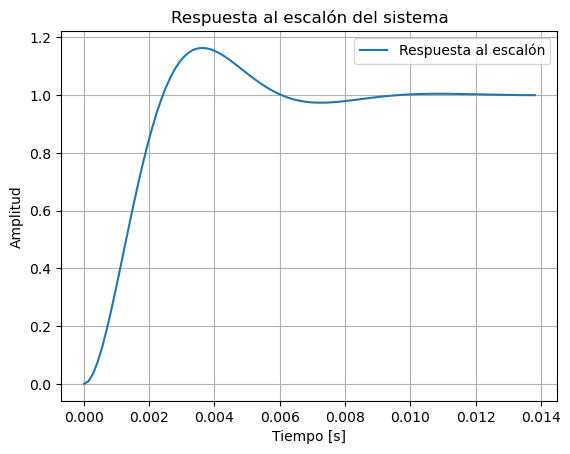

In [33]:
t,y = ct.step_response(sys)
plt.plot(t,y, label='Respuesta al escalón')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Respuesta al escalón del sistema')
plt.legend()
plt.grid()
plt.show()

In [42]:
# Función de transferencia de lazo abierto
K = 1
B = 0.1
J = 0.01
num_ol = [K]
den_ol = [J, B, 0]
G = ct.tf(num_ol, den_ol)
# Polos y ceros del sistema de lazo abierto
polos = G.poles()
ceros = G.zeros()
print("Polos del sistema de lazo abierto:", polos)
print("Ceros del sistema de lazo abierto:", ceros)

Polos del sistema de lazo abierto: [-10.+0.j   0.+0.j]
Ceros del sistema de lazo abierto: []


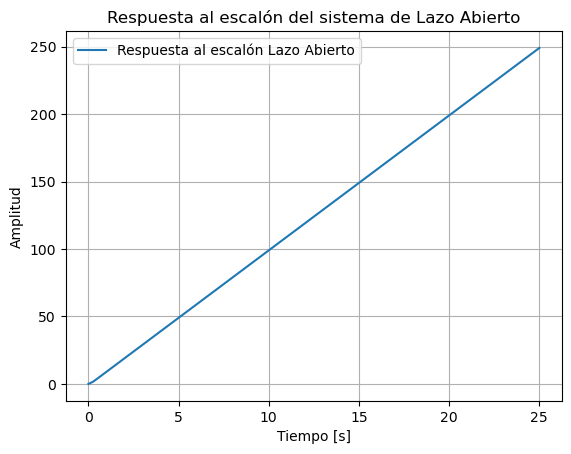

In [43]:
# respuesta al escalón del sistema de lazo abierto
t,y = ct.step_response(G)
plt.plot(t,y, label='Respuesta al escalón Lazo Abierto')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Respuesta al escalón del sistema de Lazo Abierto')
plt.legend()
plt.grid()
plt.show()

Características en el tiempo de unsistema de segundo orden:
- Respuesta al escalón
- Tiempo de subida ($t_r$) = Tiempo que tarda la respuesta en alcanzar el 100% del valor final por primera vez.
- Tiempo de asentamiento ($t_s$) = Tiempo que tarda la respuesta en permanecer dentro del 2% del valor final.
- Sobreelongación ($M_p$) = La cantidad máxima que la respuesta excede el valor final, expresada como un porcentaje del valor final.
- Tiempo de pico ($t_p$) = Tiempo que tarda la respuesta en alcanzar el sobreelongación máxima.

$$t_r = \frac{1}{\omega_d} \tan^{-1}\left(\frac{\omega_d}{-\zeta \omega_n}\right)$$
$$t_s = \frac{4}{\zeta \omega_n}$$
$$t_p = \frac{\pi}{\omega_d}$$
$$M_p = e^{\left(-\frac{\pi \zeta}{\sqrt{1-\zeta^2}}\right)} \times 100\%$$



Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


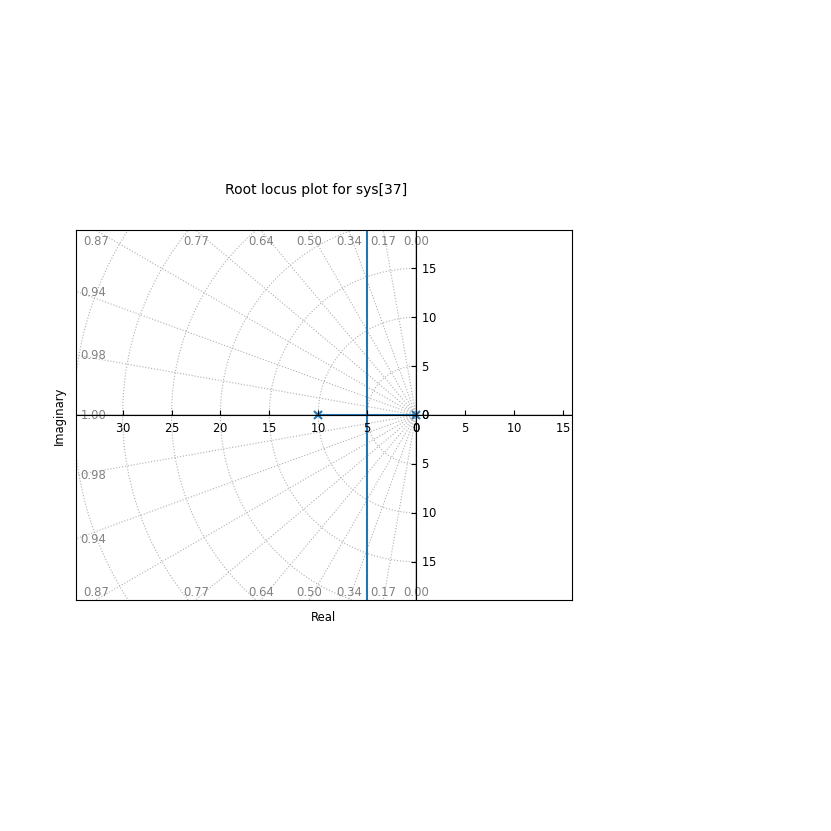

In [44]:
# Lugar de las raíces del sistema
ct.root_locus_map(G).plot()

[-6.+0.j -4.+0.j]


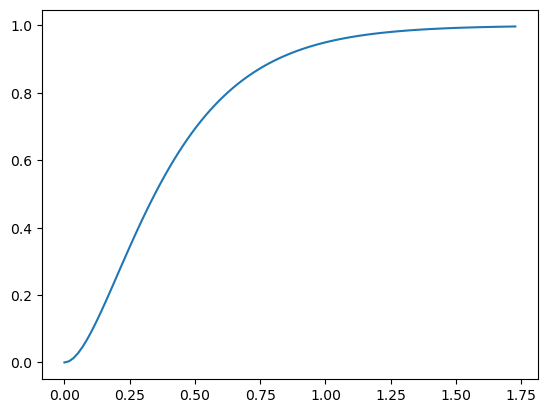

In [46]:
K = 0.24
T = ct.feedback(G*K,1)
t,y = ct.step_response(T)
plt.plot(t,y, label='Respuesta al escalón Lazo Cerrado')
print(T.poles())